# TQC 人工智慧 機器學習 證照 攻略(下)
## 第三類機器學習應用 解題分享 (5/5)

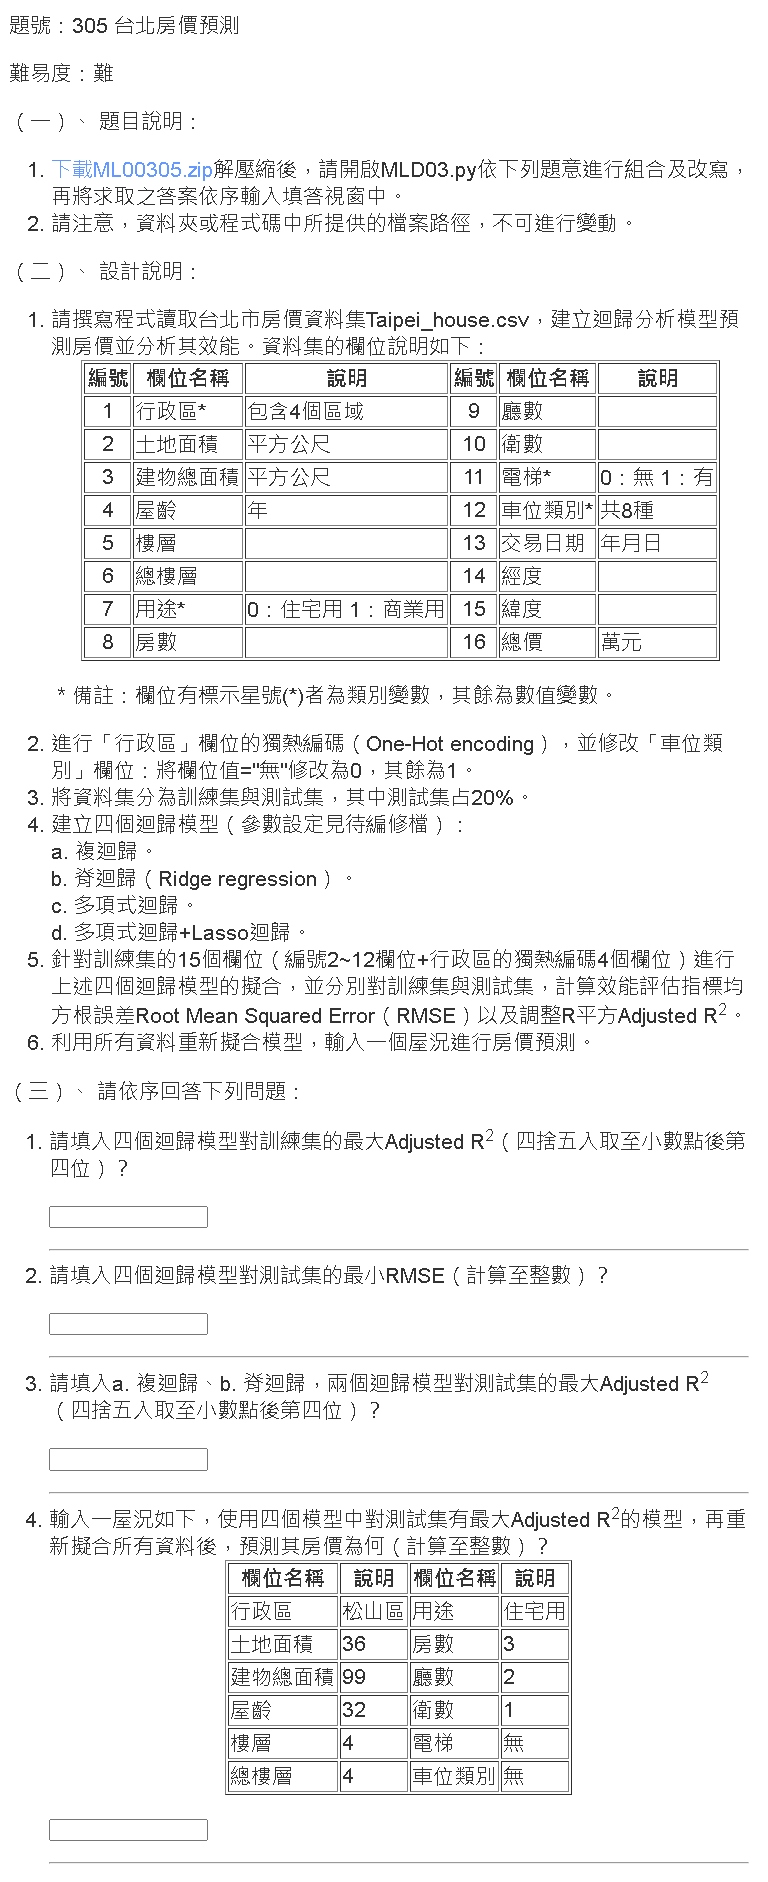

In [2]:
# #############################################################################
# 本題參數設定，請勿更改
seed = 0   # 亂數種子數  
# #############################################################################
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
# 讀取台北市房價資料集
data = pd.read_csv('Taipei_house.csv')
df = data.copy()
# 對"行政區"進行 one-hot encoding
df = pd.get_dummies(df, columns=['行政區'])
# 處理"車位類別"
df["車位類別"] = [0 if x=='無' else 1 for x in df["車位類別"]]
# 計算 Adjusted R-squared
def adj_R2(r2, n, k):
    """ 函式描述：計算 Adjusted R-squared
    參數：
        r2:R-squared 數值
        n: 樣本數
        k: 特徵數
    回傳：
        Adjusted R-squared
    """
    return r2-(k-1)/(n-k)*(1-r2)
# 切分訓練集(80%)、測試集(20%)
features= ['土地面積', '建物總面積', '屋齡', '樓層', '總樓層', '用途', 
           '房數', '廳數', '衛數', '電梯', '車位類別', 
           '行政區_信義區', '行政區_大安區', '行政區_文山區','行政區_松山區']
target = '總價'  
X = df[features]
y = df[target]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
# 複迴歸(參數皆為預設值)
# #########################################################################
# '行政區_信義區', '行政區_大安區', '行政區_文山區','行政區_松山區' 四個特徵是經過
# one-hot encoding 後產生，若欄位名稱不同可自行修改之。
# #########################################################################
from sklearn import linear_model
multi = linear_model.LinearRegression()

# 脊迴歸(Ridge regression)，除以下參數設定外，其餘為預設值
# #########################################################################
# alpha=10
# #########################################################################
ridge = linear_model.Ridge(alpha=10)

# 多項式迴歸，除以下參數設定外，其餘為預設值
# #########################################################################
# degree=2
# #########################################################################
from sklearn.preprocessing import PolynomialFeatures
X_train_py = PolynomialFeatures(degree=2).fit_transform(X_train)
X_test_py = PolynomialFeatures(degree=2).fit_transform(X_test)
poly = linear_model.LinearRegression()

# 多項式迴歸 + Lasso迴歸，除以下參數設定外，其餘為預設值
# #########################################################################
# alpha=10
# #########################################################################
lasso = linear_model.Lasso(alpha=10)

name_list = ['複迴歸', '脊迴歸', '多項式迴歸', '多項式迴歸 + Lasso迴歸']
model_list = [multi, ridge, poly, lasso]
from sklearn.metrics import mean_squared_error
for name, model in zip(name_list, model_list):
    if name=='多項式迴歸':
        X_train, X_test = X_train_py, X_test_py
    model.fit(X_train, y_train)
    adj_train_r2 = adj_R2(model.score(X_train, y_train), X_train.shape[0], X_train.shape[1])
    RMSE = (mean_squared_error(y_test, model.predict(X_test)))**0.5
    adj_test_r2 = adj_R2(model.score(X_test, y_test), X_test.shape[0], X_test.shape[1])
    print(f"{name}\n\t"
          f"{adj_train_r2 = :.4f}\n\t"
          f"{RMSE = :.0f}\n\t"
          f"{adj_test_r2 = :.4f}")

''' 預測 '''
# 利用所有資料重新擬合模型，並進行預測
X_py = PolynomialFeatures(degree=2).fit_transform(X)
lasso.fit(X_py, y)
inp = pd.DataFrame([[36, 99, 32, 4, 4, 0, 3, 2, 1, 0, 0, 0, 0, 0, 1]])
inp = PolynomialFeatures(degree=2).fit_transform(inp)
print(f"預測房價: {lasso.predict(inp)[0]:.0f}")
#features= ['土地面積', '建物總面積', '屋齡', '樓層', '總樓層', '用途', 
#           '房數', '廳數', '衛數', '電梯', '車位類別', 
#           '行政區_信義區', '行政區_大安區', '行政區_文山區','行政區_松山區']

複迴歸
	adj_train_r2 = 0.8103
	RMSE = 1069
	adj_test_r2 = 0.8045
脊迴歸
	adj_train_r2 = 0.8103
	RMSE = 1069
	adj_test_r2 = 0.8046
多項式迴歸
	adj_train_r2 = 0.9252
	RMSE = 807
	adj_test_r2 = 0.8828
多項式迴歸 + Lasso迴歸
	adj_train_r2 = 0.9216
	RMSE = 801
	adj_test_r2 = 0.8846
預測房價: 1546
